## Objetivos

**Después de completar este cuaderno podrás:**

* Usar scikit-learn para implementar regresión lineal simple
* Crear, entrenar y probar un modelo de regresión lineal en datos reales

Para este trabajo, ocuparemos las siguientes librerias:
 - NumPy
 - Matplotlib
 - Pandas
 - Scikit-learn

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

CARGAR DATASET DESDE URL

In [60]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

LEER DATOS CON PANDAS y lo guardamos en df

In [61]:
df=pd.read_csv(url)

#Mostrar 5 registros aleatorios del dataset para:
- Verificar la carga correcta de datos
- Explorar la estructura y tipos de datos
- Identificar variables y formatos

In [62]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
848,2014,NISSAN,MAXIMA,MID-SIZE,3.5,6,AV,Z,12.3,9.1,10.9,26,251
807,2014,MINI,JOHN COOPER WORKS CONVERTIBLE,MINICOMPACT,1.6,4,M6,Z,9.1,6.7,8.0,35,184
62,2014,AUDI,S8,MID-SIZE,4.0,8,AS8,Z,15.4,9.8,12.9,22,297
437,2014,GMC,SAVANA 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17,380
264,2014,CHEVROLET,SUBURBAN 4WD,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294


# Genera estadísticas resumen para todas las columnas numéricas:
- count: Número de valores no nulos
- mean: Promedio de los valores
- std: Desviación estándar (dispersión de los datos)
- min: Valor mínimo
- 25%: Primer cuartil (percentil 25)
- 50%: Mediana (percentil 50)
- 75%: Tercer cuartil (percentil 75)
- max: Valor máximo

In [63]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


De los datos, podemos observar que la mayoría de los coches (aproximadamente el 75%) tienen una eficiencia de combustible entre 11 y 31 MPG. Sin embargo, un coche muestra un valor de 60 MPG, que es mucho más alto que el resto. Esto podría ser una lectura válida para un vehículo altamente eficiente o híbrido, o podría ser un valor atípico (outlier) o un error en la entrada de datos.

MODELYEAR tiene una desviación estándar de 0, y por lo tanto no contiene información interesante.

Seleccionar algunas características que podrían ser indicativas de emisiones de CO2 para explorar más.

In [64]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
208,3.6,6,12.6,290
421,3.7,6,10.6,244
127,3.0,6,11.3,260
111,4.4,8,12.7,292
125,4.4,8,13.8,317
942,2.0,4,8.5,196
396,1.6,4,8.0,184
309,3.6,6,11.2,258
1016,2.0,4,9.1,209


#### Visualizar características

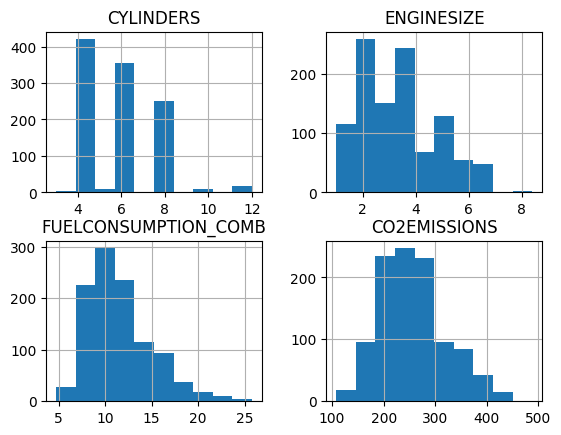

In [65]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

Como puedes ver, la mayoría de los motores tienen 4, 6 u 8 cilindros, y tamaños de motor entre 2 y 4 litros.
Como era de esperar, el consumo combinado de combustible y las emisiones de CO2 tienen distribuciones muy similares.
Adelante, muestra algunos gráficos de dispersión de estas características contra las emisiones de CO2, para ver qué tan lineales son sus relaciones.

Un gráfico con puntos azules dispersos

Eje X: Consumo de combustible (de ~5 a ~25 L/100km)

Eje Y: Emisiones de CO2 (de ~100 a ~500 g/km)

Podrás ver si existe una relación lineal entre estas variables

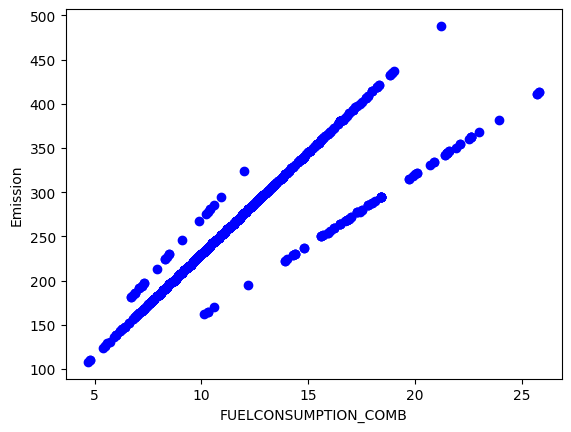

In [66]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Este es un resultado informativo. Tres grupos de coches tienen cada uno una fuerte relación lineal entre su consumo combinado de combustible y sus emisiones de CO2. Sus interceptos son similares, mientras que difieren notablemente en sus pendientes.

GRÁFICO DE DISPERSIÓN: TAMAÑO DEL MOTOR vs EMISIONES CO2

Objetivo: Visualizar la relación entre tamaño del motor y emisiones



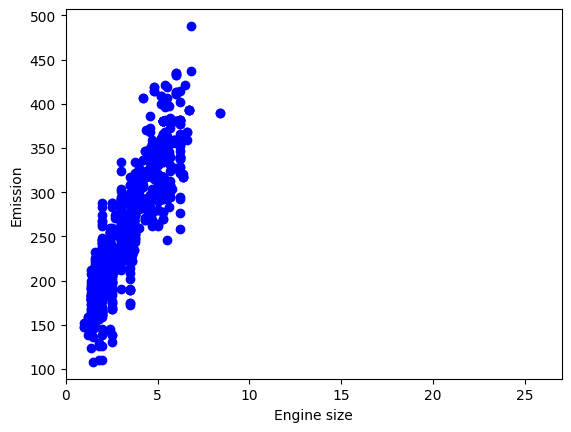

In [67]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

Aunque la relación entre el tamaño del motor y las emisiones de CO2 es bastante lineal, puedes ver que su correlación es más débil que la de cada uno de los tres grupos de consumo de combustible. Observa que el rango del eje x se ha expandido para hacer las dos gráficas más comparables.

#### Practica 1
Plot __CYLINDER__ against CO2 Emission, to see how linear their relationship is.

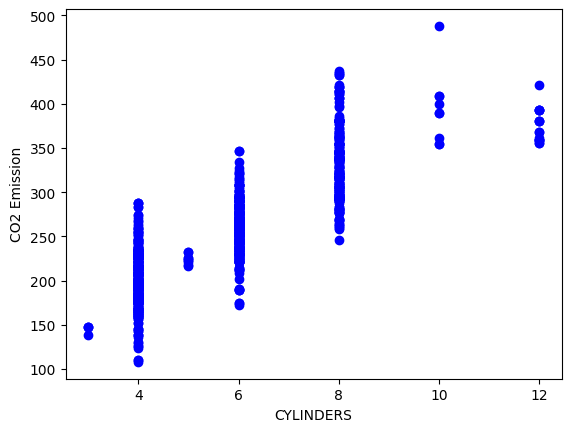

In [68]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

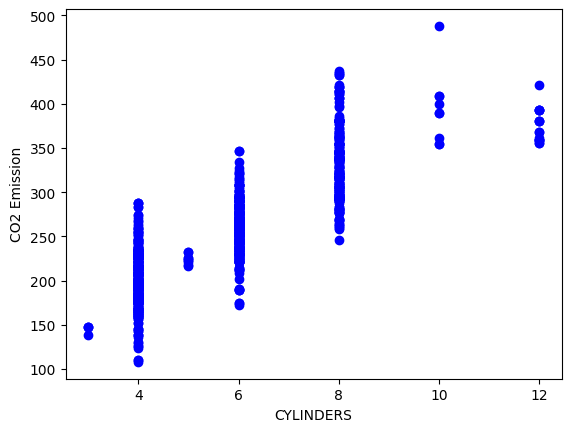

In [69]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

### Extraer la característica de entrada y las etiquetas del conjunto de datos
Aunque quizás no sea la elección ideal de característica de entrada, con fines ilustrativos, usarás el tamaño del motor para predecir las emisiones de CO2 con un modelo de regresión lineal.
Puedes comenzar el proceso extrayendo las variables de característica de entrada y salida objetivo, X e y, del conjunto de datos.

In [70]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

### Crear conjuntos de datos de entrenamiento y prueba
A continuación, dividirás el conjunto de datos en conjuntos de entrenamiento y prueba mutuamente excluyentes. Entrenarás un modelo de regresión lineal simple en el conjunto de entrenamiento y estimarás su capacidad para generalizar a datos no vistos usándolo para hacer predicciones en los datos de prueba no vistos.

Dado que el resultado de cada punto de datos es parte de los datos de prueba, tienes un medio para evaluar la precisión fuera de muestra de tu modelo.

Ahora, quieres dividir aleatoriamente tus datos en conjuntos de entrenamiento y prueba, usando el 80% del conjunto de datos para entrenamiento y reservando el 20% restante para prueba. La fracción a usar aquí depende principalmente del tamaño de tus datos, pero los tamaños típicos de prueba oscilan entre 20% y 30%. Cuanto más pequeños sean tus datos, más grande necesita ser tu conjunto de entrenamiento porque es más fácil encontrar patrones espurios en datos más pequeños. La desventaja es que tu evaluación de la generalización tendrá menos confiabilidad. Más grande es mejor cuando se trata de datos.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Las salidas son arrays o vectores unidimensionales de NumPy.

In [72]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

### Construimos un módelo de regresión lineal simple

In [73]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


"Aquí, Coefficient (Coeficiente) e Intercept (Intercepto) son los parámetros de regresión determinados por el modelo.
Definen la pendiente y el intercepto de la línea de 'mejor ajuste' a los datos de entrenamiento.

Puedes visualizar la bondad de ajuste del modelo a los datos de entrenamiento trazando la línea ajustada sobre los datos.

El modelo de regresión es la línea dada por y = intercepto + coeficiente * x.

Text(0, 0.5, 'Emission')

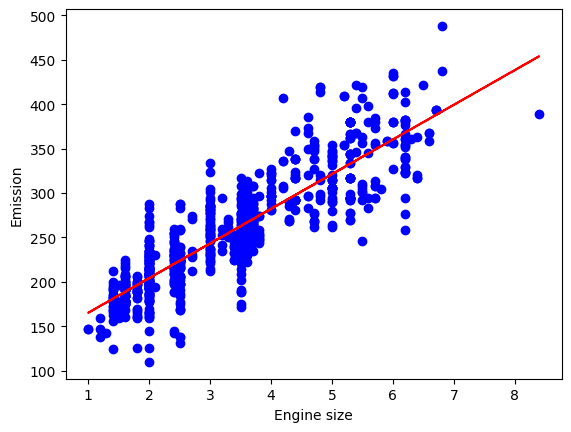

In [74]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación del modelo
Puedes comparar los valores reales y los valores predichos para calcular la precisión de un modelo de regresión. Las métricas de evaluación juegan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre áreas que requieren mejora.

Existen diferentes métricas de evaluación de modelos, usemos MSE aquí para calcular la precisión de nuestro modelo basado en el conjunto de prueba:

Error Absoluto Medio (MAE): Es la media del valor absoluto de los errores. Esta es la más fácil de entender de las métricas ya que es solo un error promedio.

Error Cuadrático Medio (MSE): MSE es la media del error al cuadrado. De hecho, es la métrica utilizada por el modelo para encontrar la línea de mejor ajuste, y por esa razón, también se le llama suma de residuos al cuadrado.

Raíz del Error Cuadrático Medio (RMSE): RMSE simplemente transforma el MSE en las mismas unidades que las variables que se están comparando, lo que puede facilitar su interpretación.

Puntaje R² no es un error sino más bien una métrica popular utilizada para estimar el rendimiento de tu modelo de regresión. Representa qué tan cerca están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor del Puntaje R², mejor se ajusta el modelo a tus datos. La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


#### 1. Traza el resultado del modelo de regresión sobre los datos de prueba en lugar de los datos de entrenamiento. Evalúa visualmente si el resultado es bueno.

Text(0, 0.5, 'Emission')

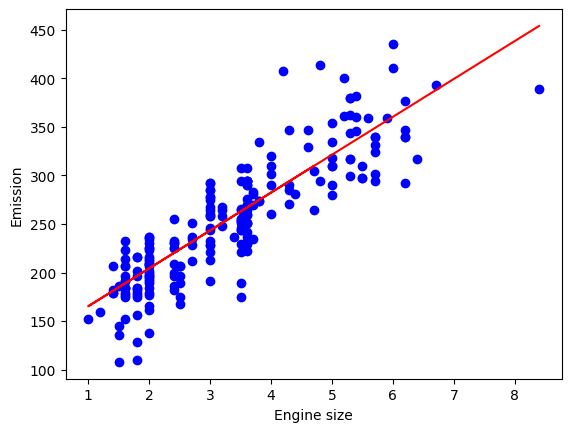

In [76]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

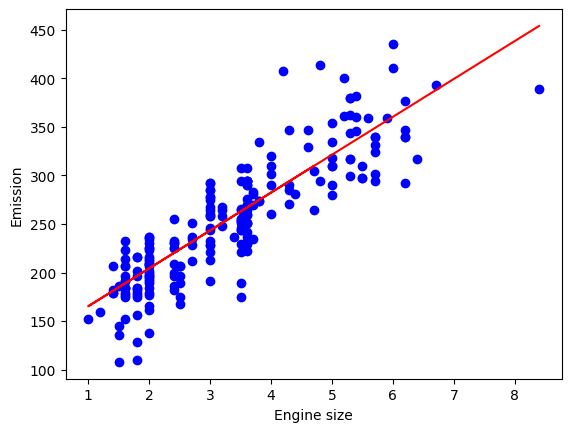

In [77]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Veamos las métricas de evaluación si entrenas un modelo de regresión usando la característica FUELCONSUMPTION_COMB.

2. Selecciona la característica de consumo de combustible del dataframe y divide los datos 80%/20% en conjuntos de entrenamiento y prueba.
Usa el mismo estado aleatorio (random state) que anteriormente para que puedas hacer una comparación objetiva con el resultado del entrenamiento previo.

In [78]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### 3. Entrena un modelo de regresión lineal usando los datos de entrenamiento que creaste.

In [79]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

#### 4. Usa el modelo para hacer predicciones de prueba en los datos de prueba de consumo de combustible.

In [80]:
y_pred= regr.predict(X_test.reshape(-1,1))

5. Calcula e imprime el Error Cuadrático Medio de las predicciones de prueba.

In [81]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 797.43


Como podrías esperar de tu análisis exploratorio, el MSE es más pequeño cuando entrenamos usando FUELCONSUMPTION_COMB en lugar de ENGINESIZE.